In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
print("First 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [4]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


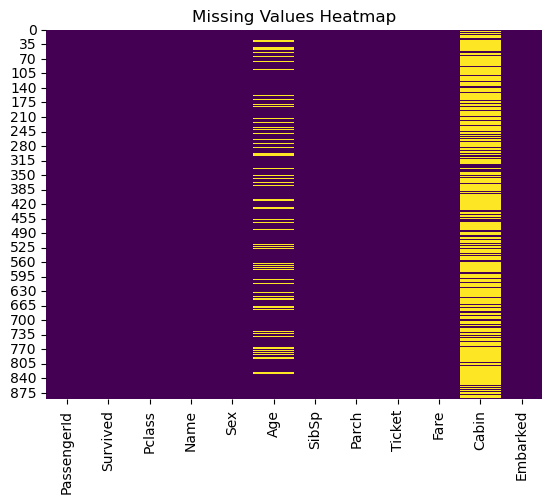

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'], errors='ignore')


In [9]:
print("\nAfter cleaning:\n", df.isnull().sum())


After cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


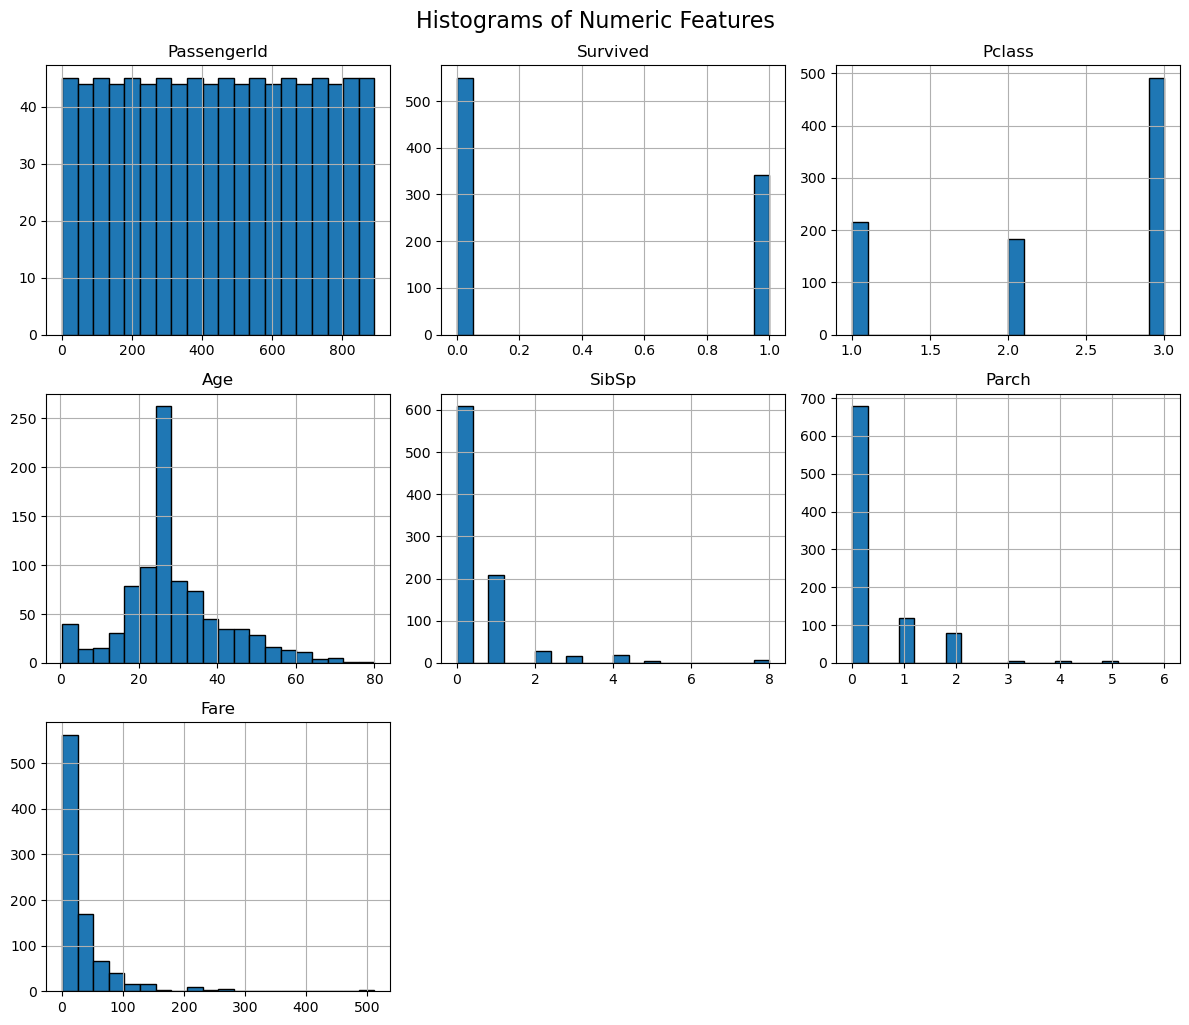

In [10]:
df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.suptitle("Histograms of Numeric Features", fontsize=16, y=1.02)
plt.show()


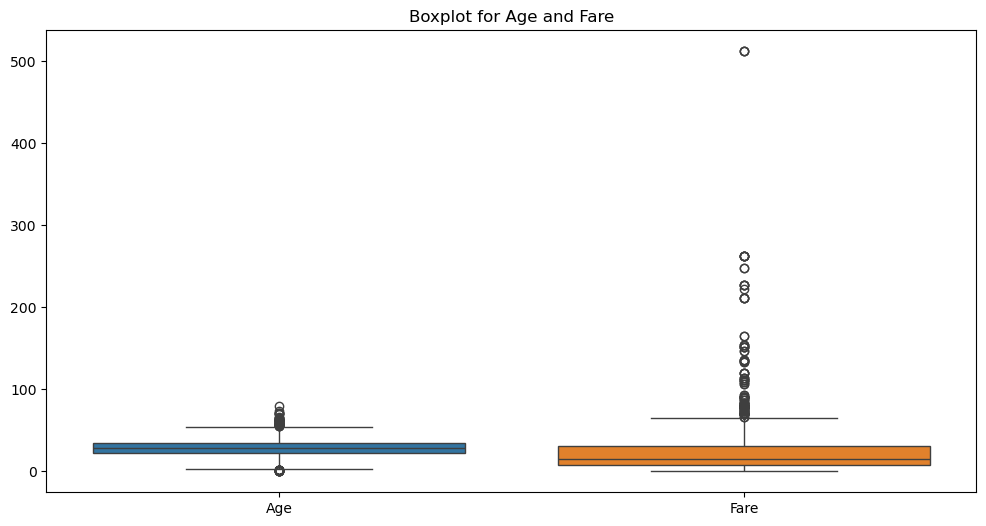

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()


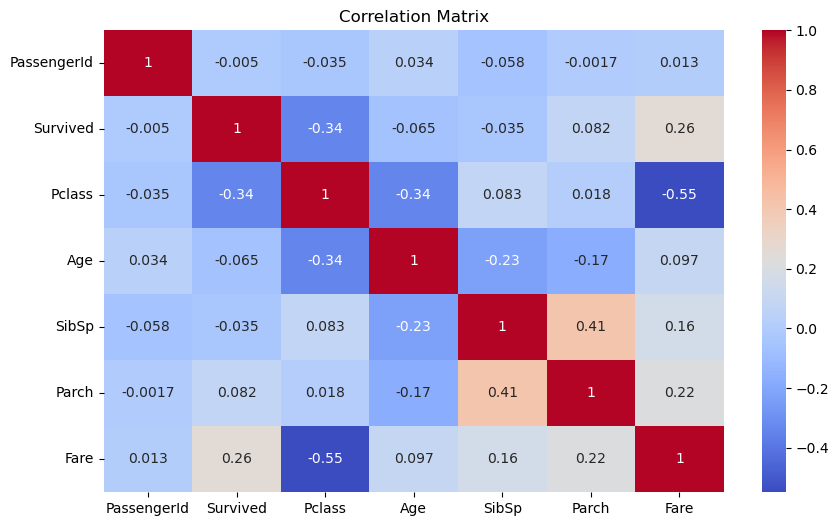

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

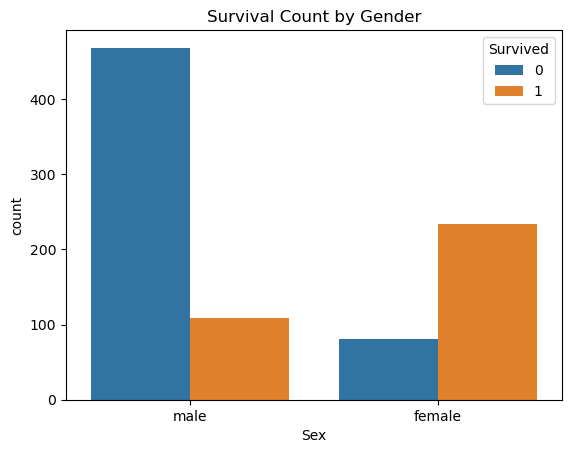

In [13]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.show()


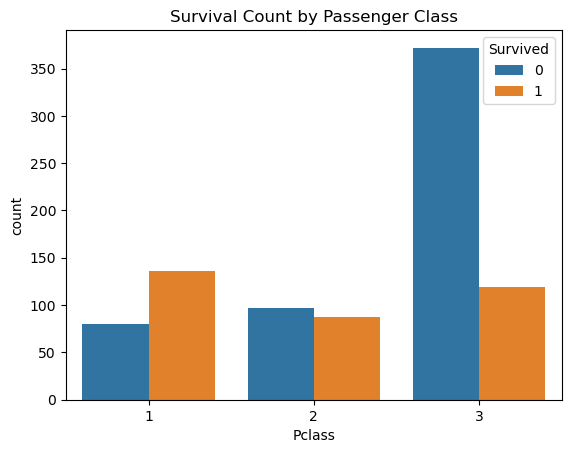

In [14]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_3832\839836025.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived']==1]['Age'], shade=True, label='Survived')
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_3832\839836025.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived']==0]['Age'], shade=True, label='Not Survived')


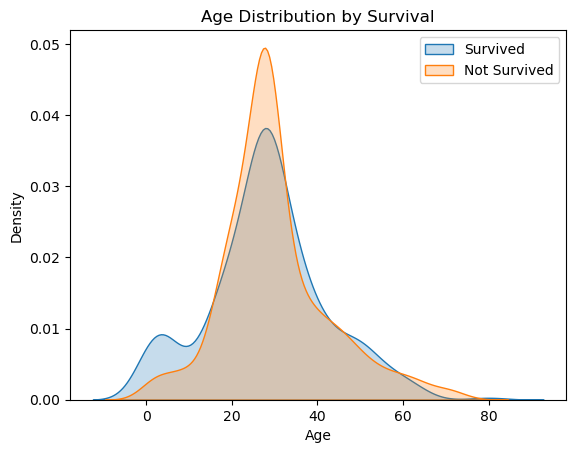

In [15]:
sns.kdeplot(data=df[df['Survived']==1]['Age'], shade=True, label='Survived')
sns.kdeplot(data=df[df['Survived']==0]['Age'], shade=True, label='Not Survived')
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

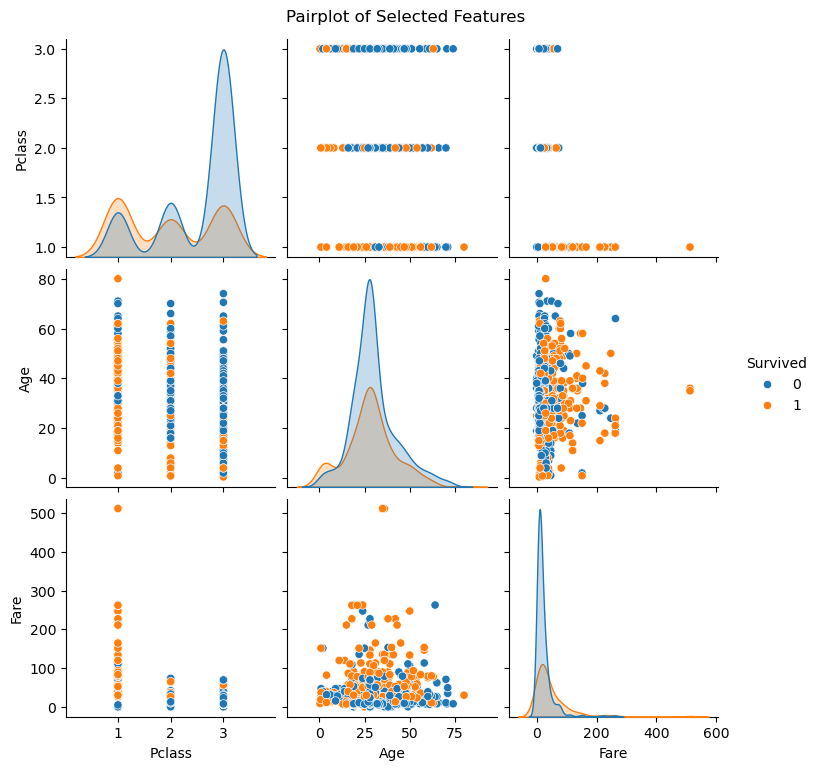

In [16]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()